In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [25]:
# Script definitions
# ------------------

# Euclidean Distance - data_1.csv

data_file = '../../lab3/data/data.1.csv'
images_dir = '../images/distance'

# Fix values for the number of operations
# Value indicated in the lab3 documentation
# 2.5 * 1024 * 1024 * 1024 = 2.5 GB in 4 bytes (float) elements

fixed_n = (2.5 * 1024 * 1024 * 1024) / 4

In [26]:
if not os.path.exists(images_dir):

	os.system("mkdir -p " + images_dir)

else :

	os.system("rm -r " + images_dir)
	os.system("mkdir -p " + images_dir)


In [27]:
data = pd.read_csv(data_file, sep=',', header=None)

# Eucliean distance - printf("PAE,%d,%ld,%d,%d,%f,%f,%f,%f,%f,%f,%f,PAE\n", num_threads, n, scheduling_types[i], chunk_sizes[j], overhead_time, malloc_time, init_time, automatic_time, manual_time, secuential_time, total_time);

data.columns = ['num_threads', 'n', 'scheduling_type', 'chunk_size', 'overhead_time', 'malloc_time', 'init_time', 'automatic_time', 'manual_time', 'sequential_time', 'total_time']

print("Total rows: {0}".format(len(data)))

Total rows: 3200


In [28]:
data = data[data['overhead_time'] < 0.1]

print("Total rows: {0}".format(len(data)))

Total rows: 3200


In [29]:
# Scheduling types
scheduling_types = {
	1: 'Static',
	2: 'Dynamic',
	3: 'Guided',
	4: 'Auto'
}

data['scheduling_type_name'] = data['scheduling_type'].map(scheduling_types)

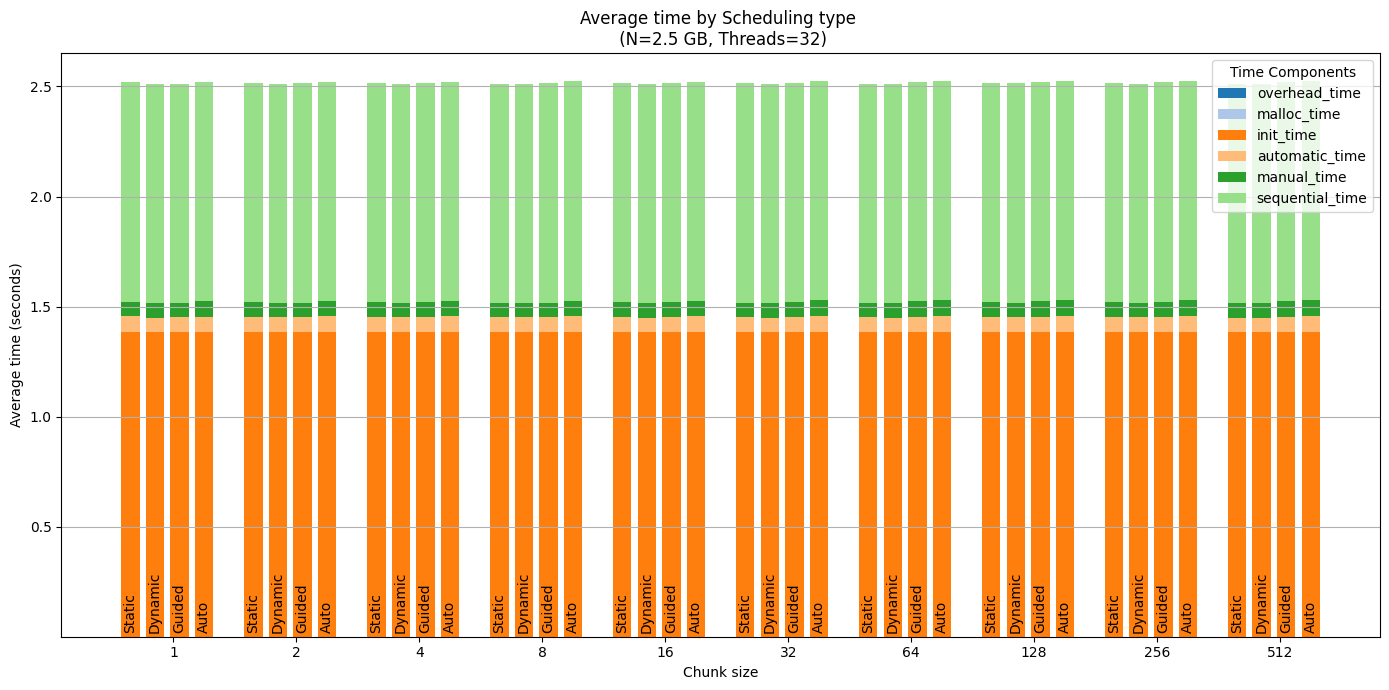

In [30]:
fixed_threads = 32

filtered_data = data[(data['num_threads'] == fixed_threads) & (data['n'] == fixed_n)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['overhead_time', 'malloc_time', 'init_time', 'automatic_time', 'manual_time', 'sequential_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (N=2.5 GB, Threads={fixed_threads})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_scheduling_avg.1.png'))
plt.show()


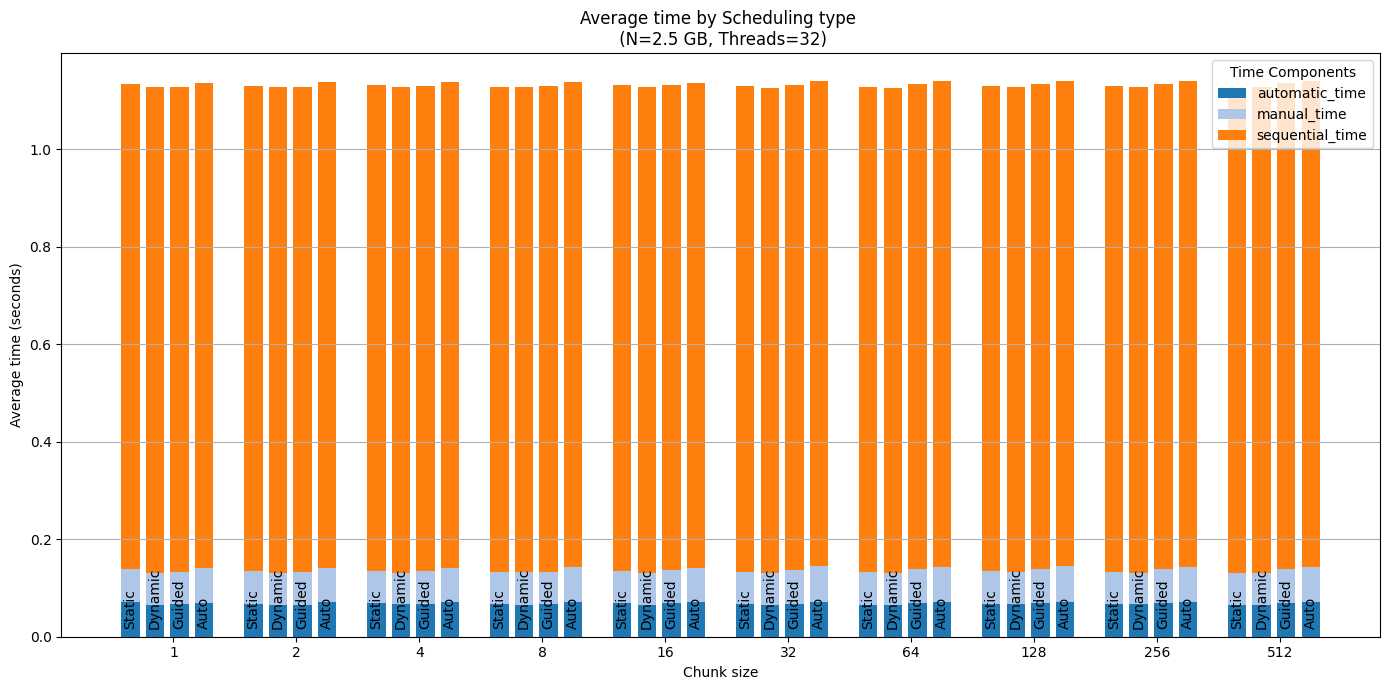

In [31]:
fixed_threads = 32

filtered_data = data[(data['num_threads'] == fixed_threads) & (data['n'] == fixed_n)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['automatic_time', 'manual_time', 'sequential_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (N=2.5 GB, Threads={fixed_threads})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_scheduling_avg.2.png'))
plt.show()


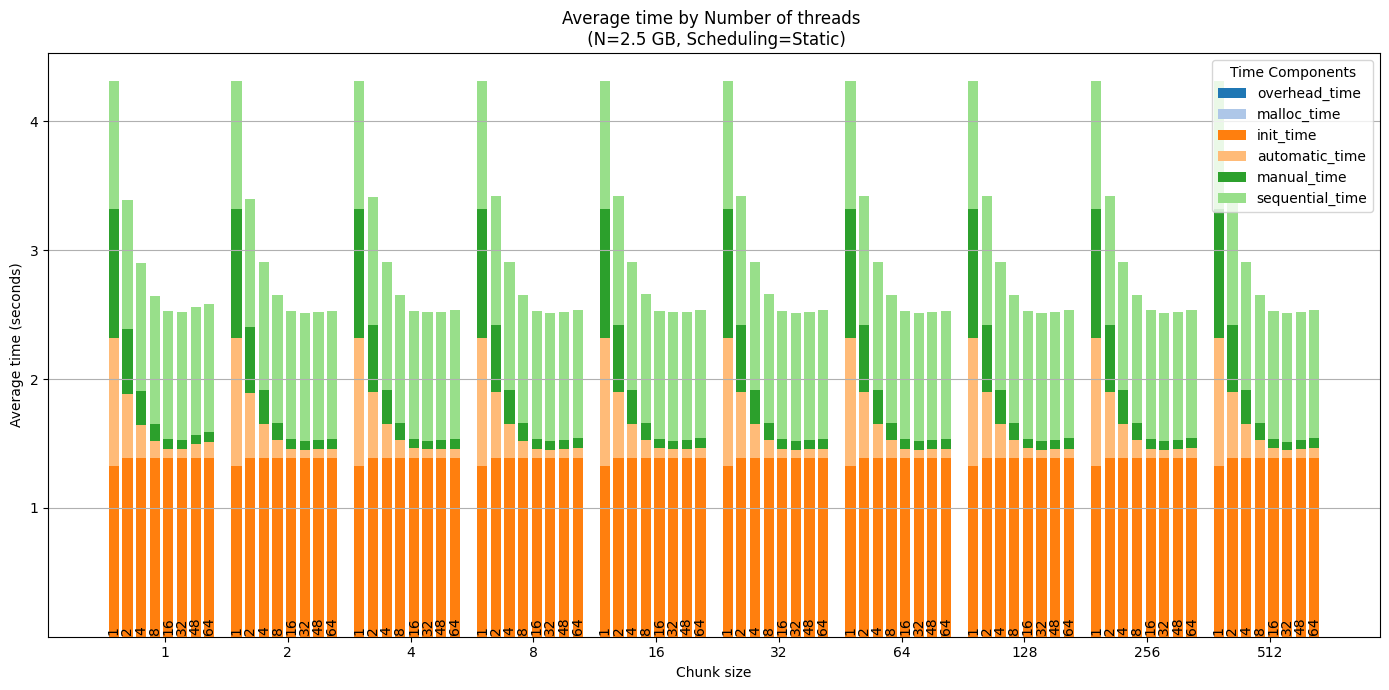

In [32]:
fixed_scheduling_type = 1

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['n'] == fixed_n)]

grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['overhead_time', 'malloc_time', 'init_time', 'automatic_time', 'manual_time', 'sequential_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (N=2.5 GB, Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_threads_avg.1.png'))
plt.show()


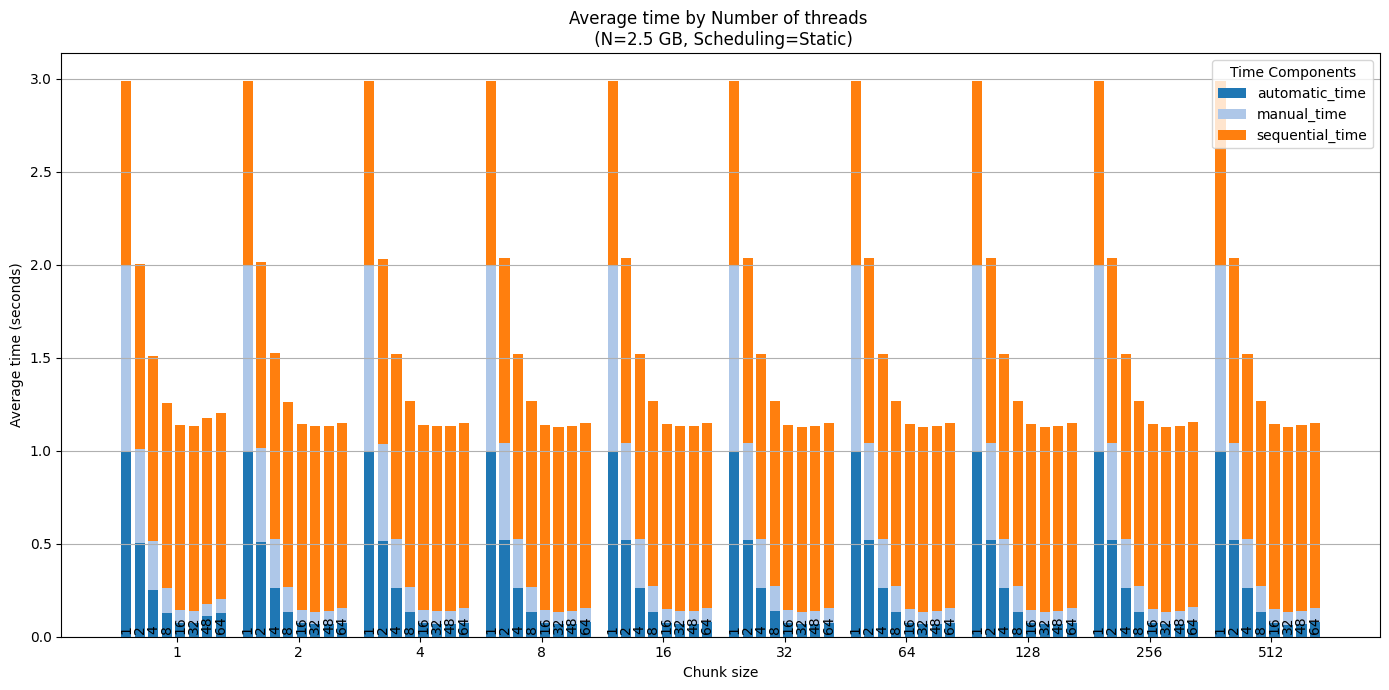

In [33]:
fixed_scheduling_type = 1

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['n'] == fixed_n)]

grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['automatic_time', 'manual_time', 'sequential_time']

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (N=2.5 GB, Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time Components')
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'stacked_bar_chunk_threads_avg.2.png'))
plt.show()


In [34]:
data_filtered = data[data['n'] == fixed_n]

n_value = data_filtered['n'].unique()[0]

min_threads = data_filtered['num_threads'].min()
ref_dataset = data_filtered[data_filtered['num_threads'] == min_threads]

ref_times_auto = ref_dataset.groupby(['scheduling_type', 'chunk_size'])['automatic_time'].mean()
ref_times_manual = ref_dataset.groupby(['scheduling_type', 'chunk_size'])['manual_time'].mean()

summary_data = []

for (threads_value, sched_type, chunk_size), group in data_filtered.groupby(['num_threads', 'scheduling_type', 'chunk_size']):

	mean_automatic_time = group['automatic_time'].mean()
	mean_manual_time = group['manual_time'].mean()
	

	ref_time_auto = ref_times_auto.get((sched_type, chunk_size), None)
	speedup_auto = ref_time_auto / mean_automatic_time
	efficiency_auto = speedup_auto / threads_value

	ref_time_manual = ref_times_manual.get((sched_type, chunk_size), None)
	speedup_manual = ref_time_manual / mean_manual_time
	efficiency_manual = speedup_manual / threads_value

	# Given by the best sequential time
	seq_time = 0.351219
	sequential_auto_speedup = seq_time / mean_automatic_time
	sequential_manual_speedup = seq_time / mean_manual_time

	summary_data.append([
		n_value,
		threads_value,
		sched_type,
		scheduling_types[sched_type],
		chunk_size,
		mean_automatic_time,
		mean_manual_time,
		ref_time_auto,
		ref_time_manual,
		speedup_auto,
		speedup_manual,
		efficiency_auto,
		efficiency_manual,
		sequential_auto_speedup,
		sequential_manual_speedup,
	])

summary_df = pd.DataFrame(summary_data, columns=[
	'N',
	'Number of threads',
	'Scheduling type',
	'Scheduling type name',
	'Chunk size',
	'Mean Auto Time',
	'Mean Manual Time',
	'Ref. Auto Time',
	'Ref. Manual Time',
	'Speedup Auto',
	'Speedup Manual',
	'Efficiency Auto',
	'Efficiency Manual',
	'Sequential Auto Speedup',
	'Sequential Manual Speedup',
])

summary_df = summary_df.round(5)

display(summary_df)

# Save summary DataFrame to LaTeX
summary_df.to_latex(os.path.join(images_dir, 'summary_df.tex'), index=False, float_format="%.5f")


,N,Number of threads,Scheduling type,Scheduling type name,Chunk size,Mean Auto Time,Mean Manual Time,Ref. Auto Time,Ref. Manual Time,Speedup Auto,Speedup Manual,Efficiency Auto,Efficiency Manual,Sequential Auto Speedup,Sequential Manual Speedup
0,671088640,1,1,Static,1,0.99545,0.99534,0.99545,0.99534,1.00000,1.00000,1.00000,1.00000,0.35282,0.35286
1,671088640,1,1,Static,2,0.99612,0.99589,0.99612,0.99589,1.00000,1.00000,1.00000,1.00000,0.35259,0.35267
2,671088640,1,1,Static,4,0.99617,0.99599,0.99617,0.99599,1.00000,1.00000,1.00000,1.00000,0.35257,0.35263
3,671088640,1,1,Static,8,0.99618,0.99599,0.99618,0.99599,1.00000,1.00000,1.00000,1.00000,0.35257,0.35263
4,671088640,1,1,Static,16,0.99608,0.99589,0.99608,0.99589,1.00000,1.00000,1.00000,1.00000,0.35260,0.35267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,671088640,64,4,Auto,32,0.07705,0.07765,0.99618,0.99599,12.92886,12.82650,0.20201,0.20041,4.55827,4.52305
316,671088640,64,4,Auto,64,0.07808,0.07853,0.99615,0.99596,12.75867,12.68287,0.19935,0.19817,4.49842,4.47252
317,671088640,64,4,Auto,128,0.07796,0.07892,0.99614,0.99604,12.77717,12.62039,0.19964,0.19719,4.50497,4.45014
318,671088640,64,4,Auto,256,0.08039,0.07904,0.99607,0.99597,12.39073,12.60076,0.19361,0.19689,4.36901,4.44353


/tmp/ipykernel_132178/3078017327.py:73: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  summary_df.to_latex(os.path.join(images_dir, 'summary_df.tex'), index=False, float_format="%.5f")


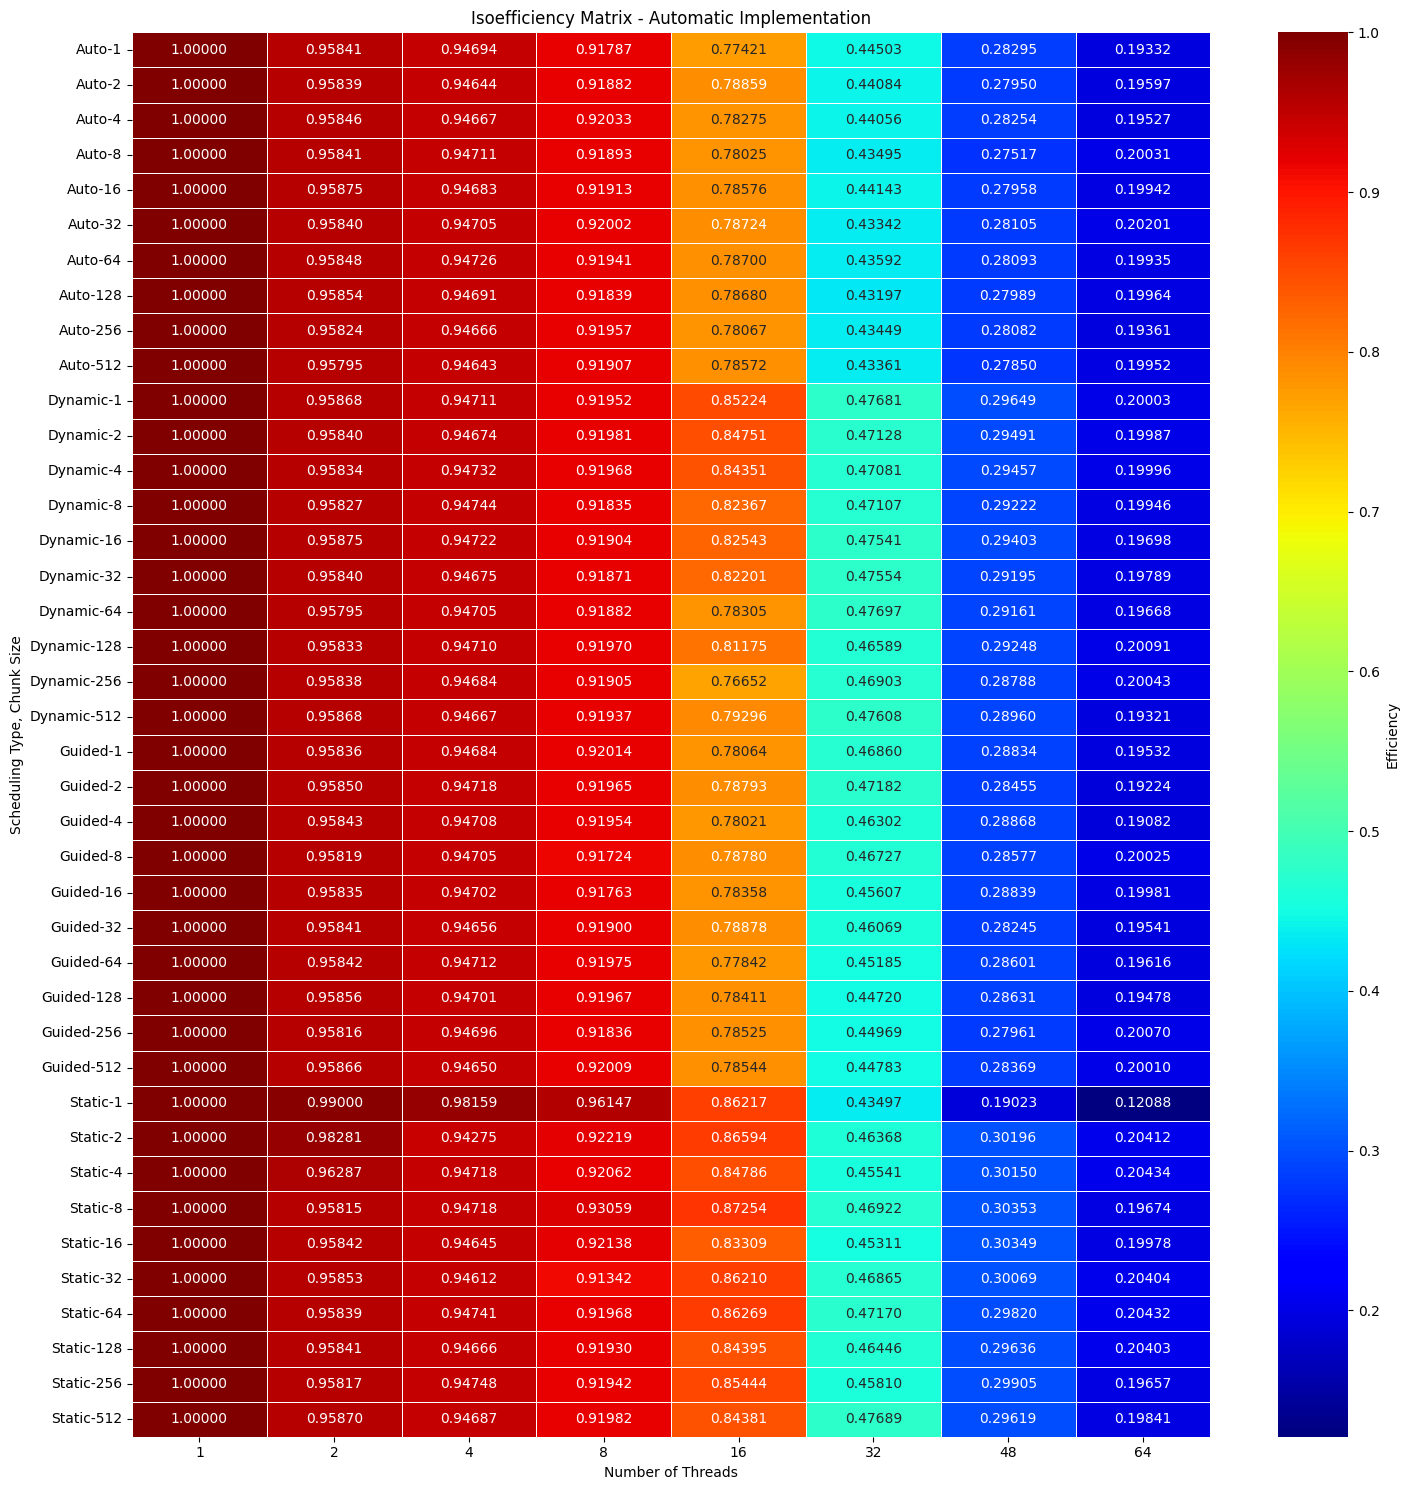

In [35]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency Auto',
	index=['Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency Matrix - Automatic Implementation')
plt.ylabel('Scheduling Type, Chunk Size')
plt.xlabel('Number of Threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_automatic.png'))

plt.show()


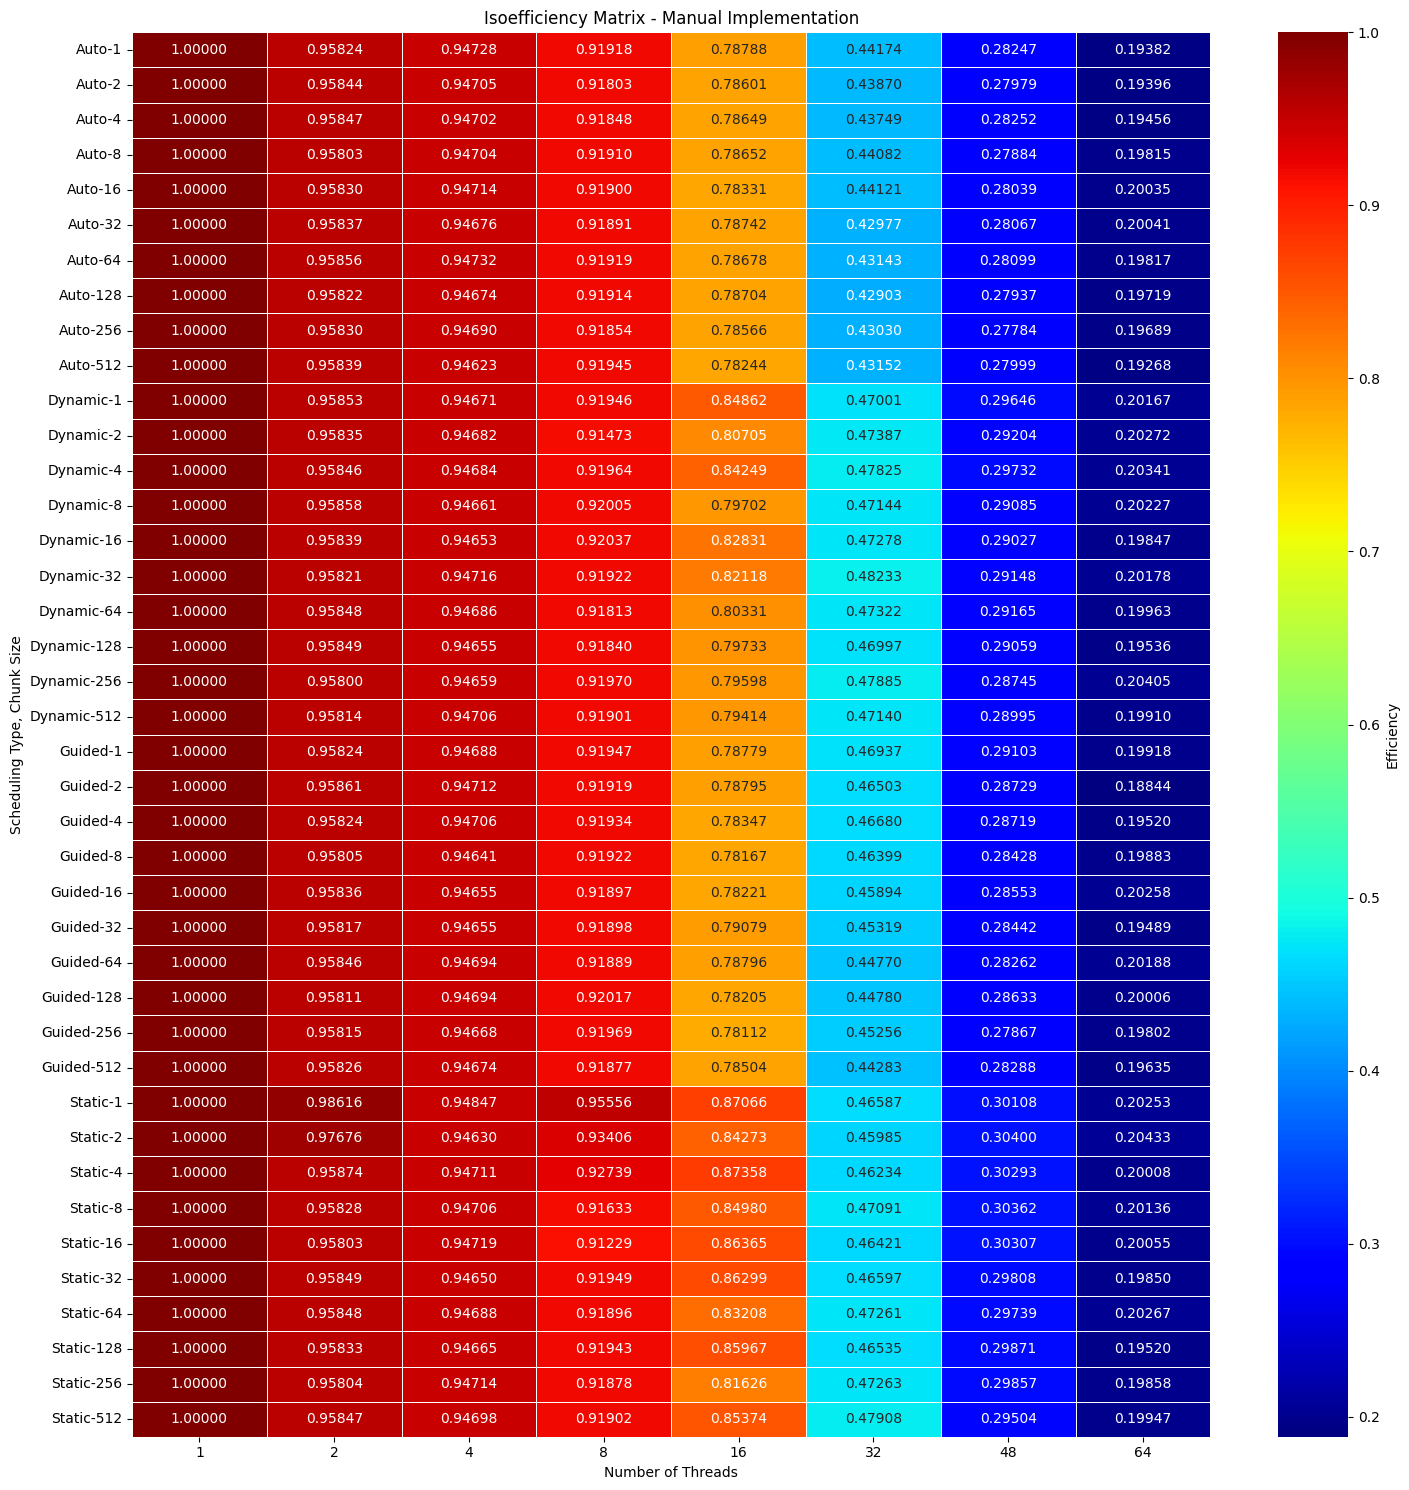

In [36]:
manual_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency Manual',
	index=['Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(manual_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency Matrix - Manual Implementation')
plt.ylabel('Scheduling Type, Chunk Size')
plt.xlabel('Number of Threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_manual.png'))

plt.show()

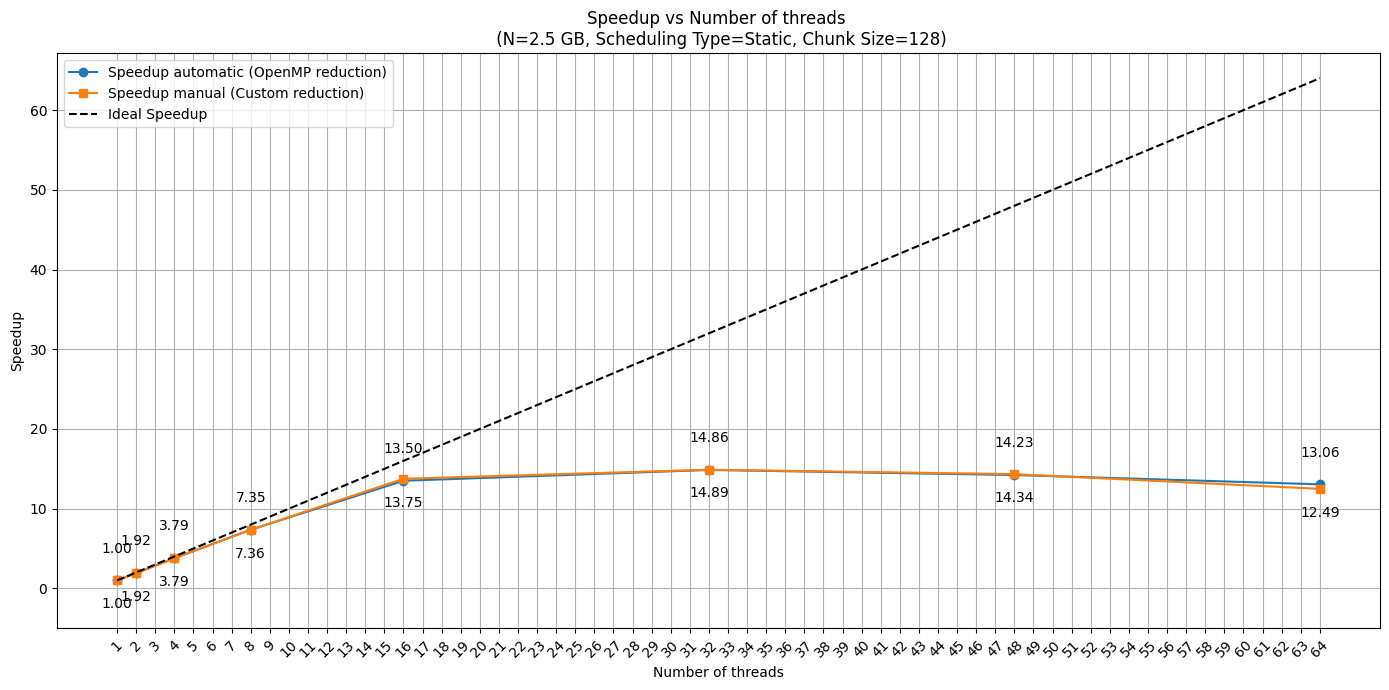

In [37]:
fixed_scheduling_type = 1
fixed_chunk_size = 128

filtered_df = summary_df[(summary_df['N'] == n_value) & (summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Speedup Auto'], marker='o', label='Speedup automatic (OpenMP reduction)')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup Manual'], marker='s', label='Speedup manual (Custom reduction)')
plt.plot([1, max_threads], [1, max_threads], 'k--', label='Ideal Speedup')

plt.title(f'Speedup vs Number of threads \n (N=2.5 GB, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(bottom=-5)

plt.grid()

plt.legend()

for i, row in filtered_df.iterrows():

	plt.annotate(f"{row['Speedup Auto']:.2f}", (row['Number of threads'], row['Speedup Auto']), textcoords="offset points", xytext=(0,20), ha='center')
	plt.annotate(f"{row['Speedup Manual']:.2f}", (row['Number of threads'], row['Speedup Manual']), textcoords="offset points", xytext=(0,-20), ha='center')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'speedup_vs_threads.png'))

plt.show()


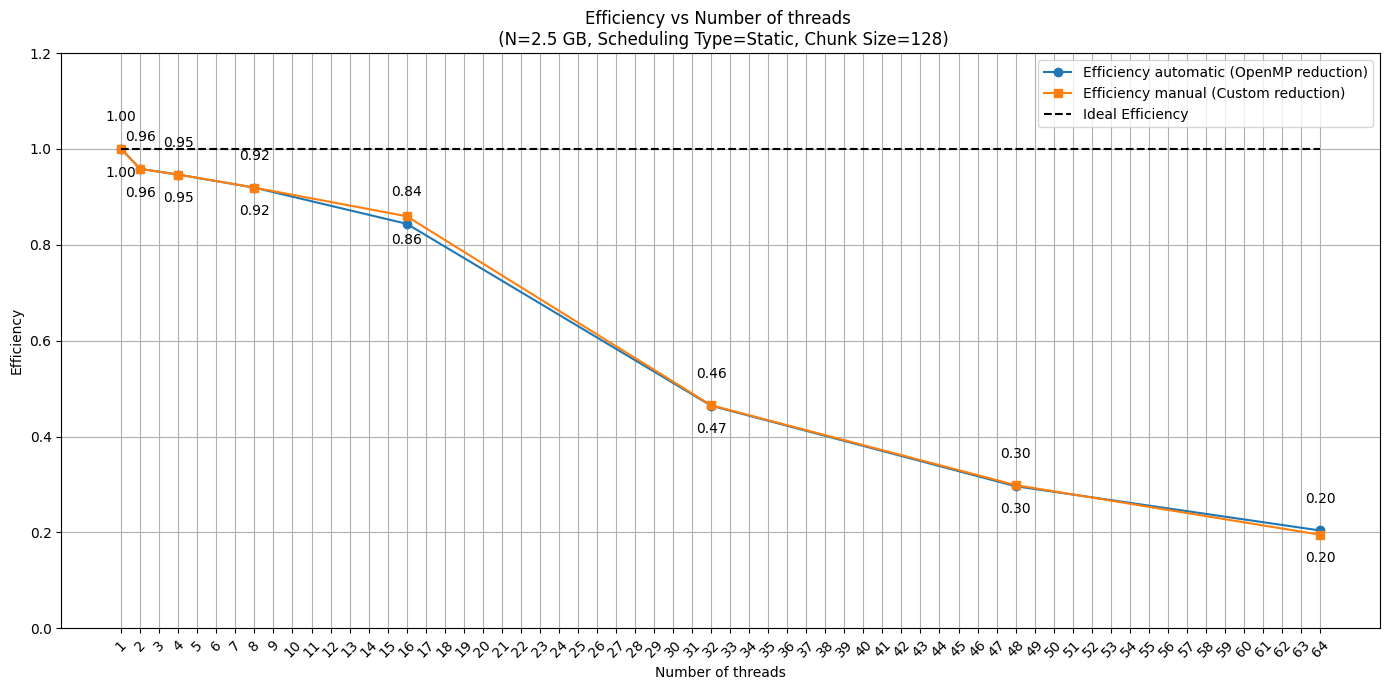

In [38]:
fixed_scheduling_type = 1
fixed_chunk_size = 128

filtered_df = summary_df[(summary_df['N'] == n_value) & (summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency Auto'], marker='o', label='Efficiency automatic (OpenMP reduction)')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency Manual'], marker='s', label='Efficiency manual (Custom reduction)')
plt.plot([1, max_threads], [1, 1], 'k--', label='Ideal Efficiency')

plt.title(f'Efficiency vs Number of threads \n (N=2.5 GB, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Efficiency')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(0, 1.2)

plt.grid()

plt.legend()

for i, row in filtered_df.iterrows():

	plt.annotate(f"{row['Efficiency Auto']:.2f}", (row['Number of threads'], row['Efficiency Auto']), textcoords="offset points", xytext=(0,20), ha='center')
	plt.annotate(f"{row['Efficiency Manual']:.2f}", (row['Number of threads'], row['Efficiency Manual']), textcoords="offset points", xytext=(0,-20), ha='center')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'efficiency_vs_threads.png'))

plt.show()
